In [22]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

In [8]:
from sklearn.datasets import load_iris
X = load_iris().data
y = load_iris().target
# X_train, X_test, y_train, y_test = 
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [23]:
knn = KNeighborsClassifier(3)

In [26]:
cross_val_score(knn,X,y,cv=5).mean() # cv는 cross validation 갯수

0.9666666666666668

In [27]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [28]:
knn.score(X_test,y_test)

0.9666666666666667

In [29]:
from sklearn.preprocessing import PolynomialFeatures

In [32]:
poly = PolynomialFeatures(degree=3)

In [33]:
poly.fit_transform([[3]])

array([[ 1.,  3.,  9., 27.]])

In [34]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

def PolynomialRegression(degree=2, **kwargs):
    return make_pipeline(PolynomialFeatures(degree),
                         LinearRegression(**kwargs))

In [35]:
import numpy as np

def make_data(N, err=1.0, rseed=1):
    # randomly sample the data
    rng = np.random.RandomState(rseed)
    X = rng.rand(N, 1) ** 2
    y = 10 - 1. / (X.ravel() + 0.1)
    if err > 0:
        y += err * rng.randn(N)
    return X, y

X, y = make_data(40)

In [38]:
from sklearn.linear_model import LinearRegression

In [39]:
linear_model = LinearRegression()

In [40]:
linear_model.fit(X,y)

LinearRegression()

In [41]:
linear_model.score(X,y)

0.724324304506582

In [42]:
linear_model.coef_

array([9.55070946])

In [43]:
linear_model.intercept_

2.66491601711976

In [45]:
import matplotlib.pyplot as plt

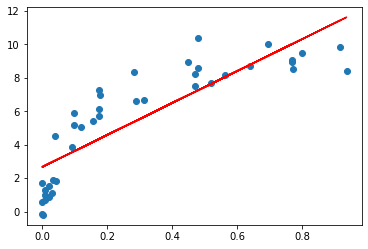

In [49]:
plt.scatter(X,y)
plt.plot(X, linear_model.predict(X),color='red')

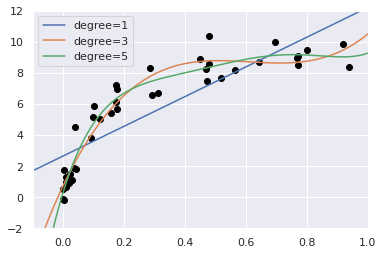

In [51]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()  # plot formatting

X_test = np.linspace(-0.1, 1.1, 500)[:, None]

plt.scatter(X.ravel(), y, color='black')
axis = plt.axis()
for degree in [1, 3, 5]:
    y_test = PolynomialRegression(degree).fit(X, y).predict(X_test)
    plt.plot(X_test.ravel(), y_test, label='degree={0}'.format(degree))
plt.xlim(-0.1, 1.0)
plt.ylim(-2, 12)
plt.legend(loc='best');

In [53]:
import numpy as np

def make_data(N, err=1.0, rseed=1):
    # randomly sample the data
    rng = np.random.RandomState(rseed)
    X = rng.rand(N, 1) ** np.random.randint(1, 6,size=1)
    y = 10 - 1. / (X.ravel() + 0.1)
    if err > 0:
        y += err * rng.randn(N)
    return X, y

X, y = make_data(40)

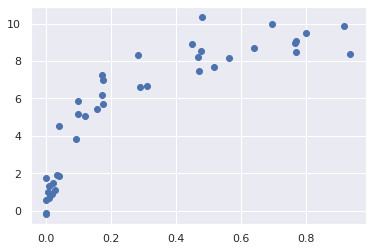

In [54]:
plt.scatter(X,y)

In [73]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV

In [71]:
poly_1 = PolynomialFeatures(7)
X_2 = poly_1.fit_transform(X)

In [72]:
poly_1_model = LinearRegression()
poly_1_model.fit(X_2,y)
poly_1_model.score(X_2,y)

0.9479083935119214

In [75]:
param_grid = {'polynomialfeatures__degree': np.arange(21)}

grid = GridSearchCV(PolynomialRegression(), param_grid, cv=7)

In [76]:
grid.fit(X,y)

GridSearchCV(cv=7,
             estimator=Pipeline(steps=[('polynomialfeatures',
                                        PolynomialFeatures()),
                                       ('linearregression',
                                        LinearRegression())]),
             param_grid={'polynomialfeatures__degree': array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20])})

In [82]:
grid.best_estimator_.fit(X,y)
grid.best_estimator_.score(X,y)

0.9448003851414912